In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import SimpleITK as sitk
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.dataset import random_split
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.utils.data import Subset
import warnings
warnings.filterwarnings('ignore')

____________________________
### Read  Images and Store in Dictionary

In [30]:
suffices = ['00','01','03','06','17','20','22','23','27','29','32','33','35','38','40','41']
prefix1 = '100'
prefix2 = '10000'
img_types = ['adc','cor','hbv','sag','t2w']

img_dict = {}
for i in suffices:
    folder = prefix1 + i
    file_name_1 = prefix1 + i
    file_name_2 = prefix2 + i
    root_path = '/Users/yenhann/Downloads/cv_airdrop_yen/' + folder + '/' + str(file_name_1 + '_' + file_name_2)
    for j in img_types:
        full_path = root_path + '_' + j + '.mha'
        img = sitk.ReadImage(full_path)
        img = sitk.GetArrayFromImage(img)
        
        # store in dictionary
        img_dict[str(file_name_1 + '_' + file_name_2 + '_' + j)] = img

### Find Maximum Number of Channel Dimensions

In [42]:
channels = {}
for i in img_dict.keys():
    channels[i] = img_dict[i].shape[0]

# find max channels value and its corresponding key
max_channel = max(channels.values())
max_channel_key = max(channels, key=channels.get)

# print out the max channel and its corresponding key
print('Maximum channels = ', max_channel)
print('Maximum channels image set = ', max_channel_key)
print('Shape = ', img_dict[max_channel_key].shape)

Maximum channels =  104
Maximum channels image set =  10033_1000033_cor
Shape =  (104, 256, 256)


### Apply Zero Padding Channel-Wise until Maximum Channel Shape

In [45]:
img_dict['10000_1000000_adc'].shape

# create zero value images equivalent to shape[1] and shape[2] and append along dimension 0
for i in img_dict.keys():
    if img_dict[i].shape[0] < max_channel:

        # compute difference between maximum and current number of channels
        diff = max_channel - img_dict[i].shape[0]

        # create 3d image with channels = diff, height = shape[1], width = shape[2]
        zero_img = np.zeros((diff, img_dict[i].shape[1], img_dict[i].shape[2]))

        # concatenate along dimension 0
        img_dict[i] = np.concatenate((img_dict[i], zero_img), axis=0)

        # print shape
        print('Shape = ', img_dict[i].shape)

Shape =  (104, 640, 640)
Shape =  (104, 114, 116)
Shape =  (104, 640, 640)
Shape =  (104, 640, 640)
Shape =  (104, 128, 120)
Shape =  (104, 320, 320)
Shape =  (104, 128, 120)
Shape =  (104, 320, 320)
Shape =  (104, 640, 640)
Shape =  (104, 128, 120)
Shape =  (104, 320, 320)
Shape =  (104, 128, 120)
Shape =  (104, 320, 320)
Shape =  (104, 384, 384)
Shape =  (104, 128, 120)
Shape =  (104, 320, 320)
Shape =  (104, 128, 120)
Shape =  (104, 320, 320)
Shape =  (104, 384, 384)
Shape =  (104, 128, 84)
Shape =  (104, 320, 320)
Shape =  (104, 128, 84)
Shape =  (104, 320, 320)
Shape =  (104, 384, 384)
Shape =  (104, 128, 120)
Shape =  (104, 320, 320)
Shape =  (104, 128, 120)
Shape =  (104, 320, 320)
Shape =  (104, 640, 640)
Shape =  (104, 256, 256)
Shape =  (104, 720, 720)
Shape =  (104, 256, 256)
Shape =  (104, 864, 864)
Shape =  (104, 1024, 1024)
Shape =  (104, 128, 88)
Shape =  (104, 320, 320)
Shape =  (104, 128, 88)
Shape =  (104, 320, 320)
Shape =  (104, 320, 320)
Shape =  (104, 256, 256)
Sh

### Find Minimum Dimensions in Height (Shape[1]) and Width (Shape[2])

In [55]:
# find the minimum height and width
min_height = min([img_dict[i].shape[1] for i in img_dict.keys()])
min_height_key = min(img_dict, key=lambda x: img_dict[x].shape[1])

print('Minimum height = ', min_height)
print('Minimum height image set = ', min_height_key)

min_width = min([img_dict[i].shape[2] for i in img_dict.keys()])
min_width_key = min(img_dict, key=lambda x: img_dict[x].shape[2])

print('Minimum width = ', min_width)
print('Minimum width image set = ', min_width_key)

Minimum height =  114
Minimum height image set =  10000_1000000_adc
Minimum width =  84
Minimum width image set =  10017_1000017_adc


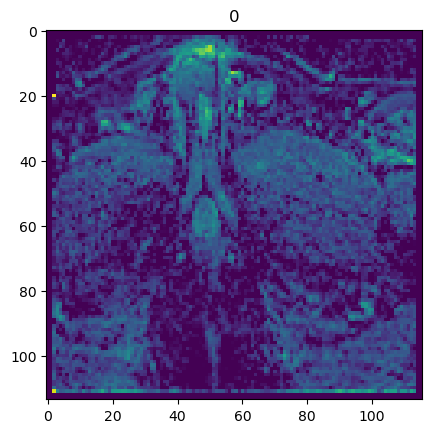

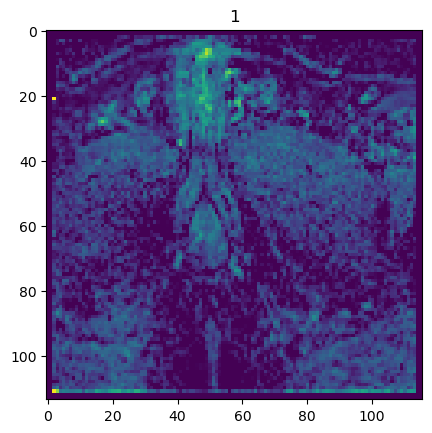

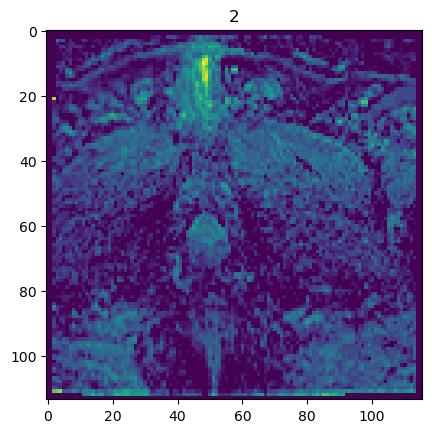

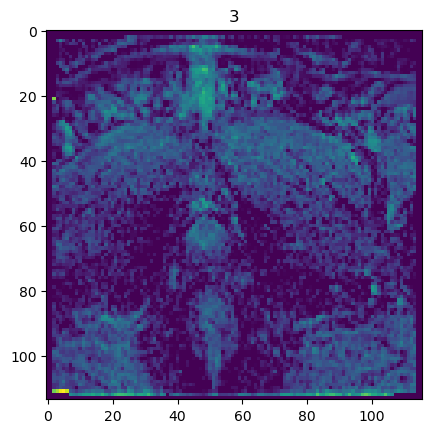

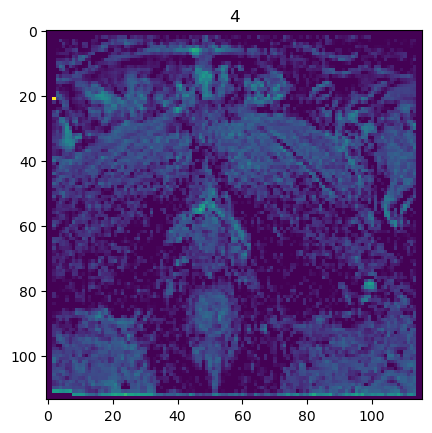

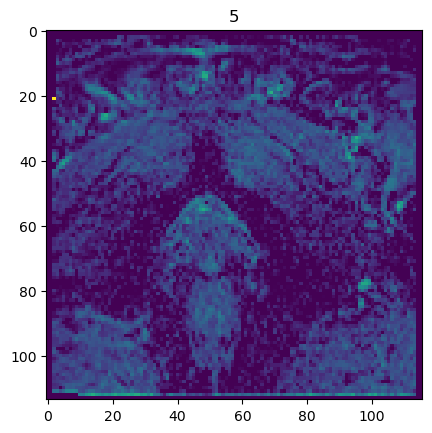

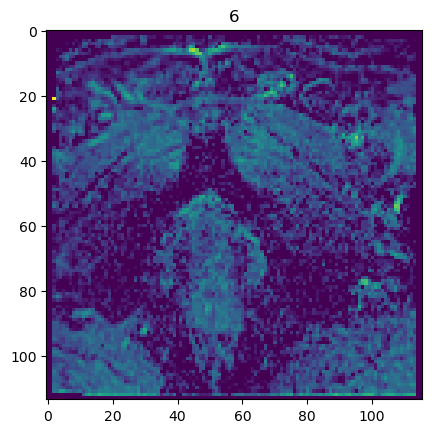

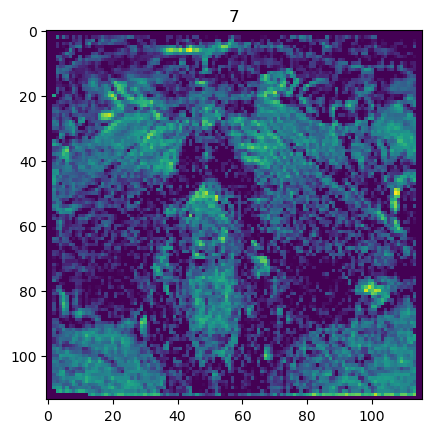

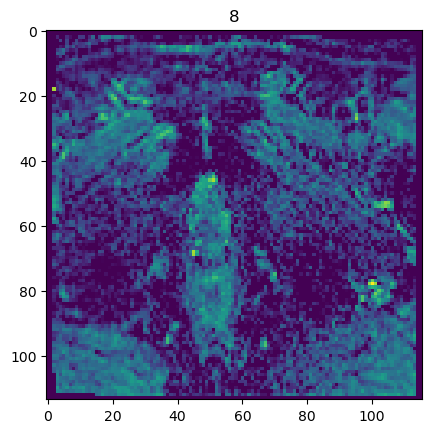

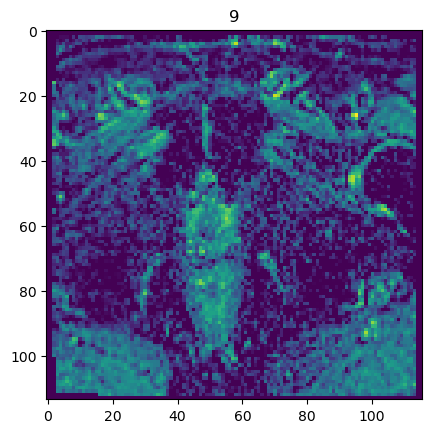

In [9]:
# look at first 10 images
for i in range(0,10):
    plt.imshow(img[i,:,:])
    plt.title(str(i))
    plt.show()